In [6]:
import seaborn as sns
import numpy as np
from scipy.io import arff
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
sns.set_theme(palette='colorblind')

# set global random seed so that the notes are the same each time the site builds
np.random.seed(1103)

Preparing dataset...

In [56]:
rice_data = arff.loadarff('Rice_Cammeo_Osmancik.arff')

In [57]:
rice_df = pd.DataFrame(rice_data[0])

In [58]:
rice_df.head(1)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   

   Convex_Area    Extent      Class  
0      15617.0  0.572896  b'Cammeo'

In [60]:
catCols = [col for col in rice_df.columns if rice_df[col].dtype == "O"]

In [61]:
rice_df[catCols] = rice_df[catCols].apply(lambda x: x.str.decode('utf8'))

In [62]:
rice_df.head(1)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo

This data pertains to the features observed from two different species of rice (Cammeo and Osmancik).

Clustering is used frequently in the real world to identify patterns/behaviors that may not be so apparent such as shopping habits, diseases, etc.

In this case, clustering aims to identify any hidden patterns that can be used to differentiate the two different species.

In [71]:
rice_X = rice_df.drop(columns=['Class'])

Drop the target variable

In [72]:
rice_X.head(1)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   

   Convex_Area    Extent  km  
0      15617.0  0.572896   7

Creating a Kmeans estimator object with default model parameters. 

In [96]:
km = KMeans(n_init=10)

In [97]:
km.fit_predict(rice_X)

array([7, 0, 0, ..., 3, 6, 1])

In [98]:
rice_df['km'] = km.fit_predict(rice_X)

Added the predictions as a new column to the original rice_df.

In [99]:
rice_df.sample(2)

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
3143  11732.0  441.122986         176.483490          86.192467      0.872626   
1834  10150.0  405.355988         169.095825          76.932335      0.890510   

      Convex_Area    Extent     Class  km  
3143      12076.0  0.637470  Osmancik   0  
1834      10358.0  0.636045  Osmancik   7

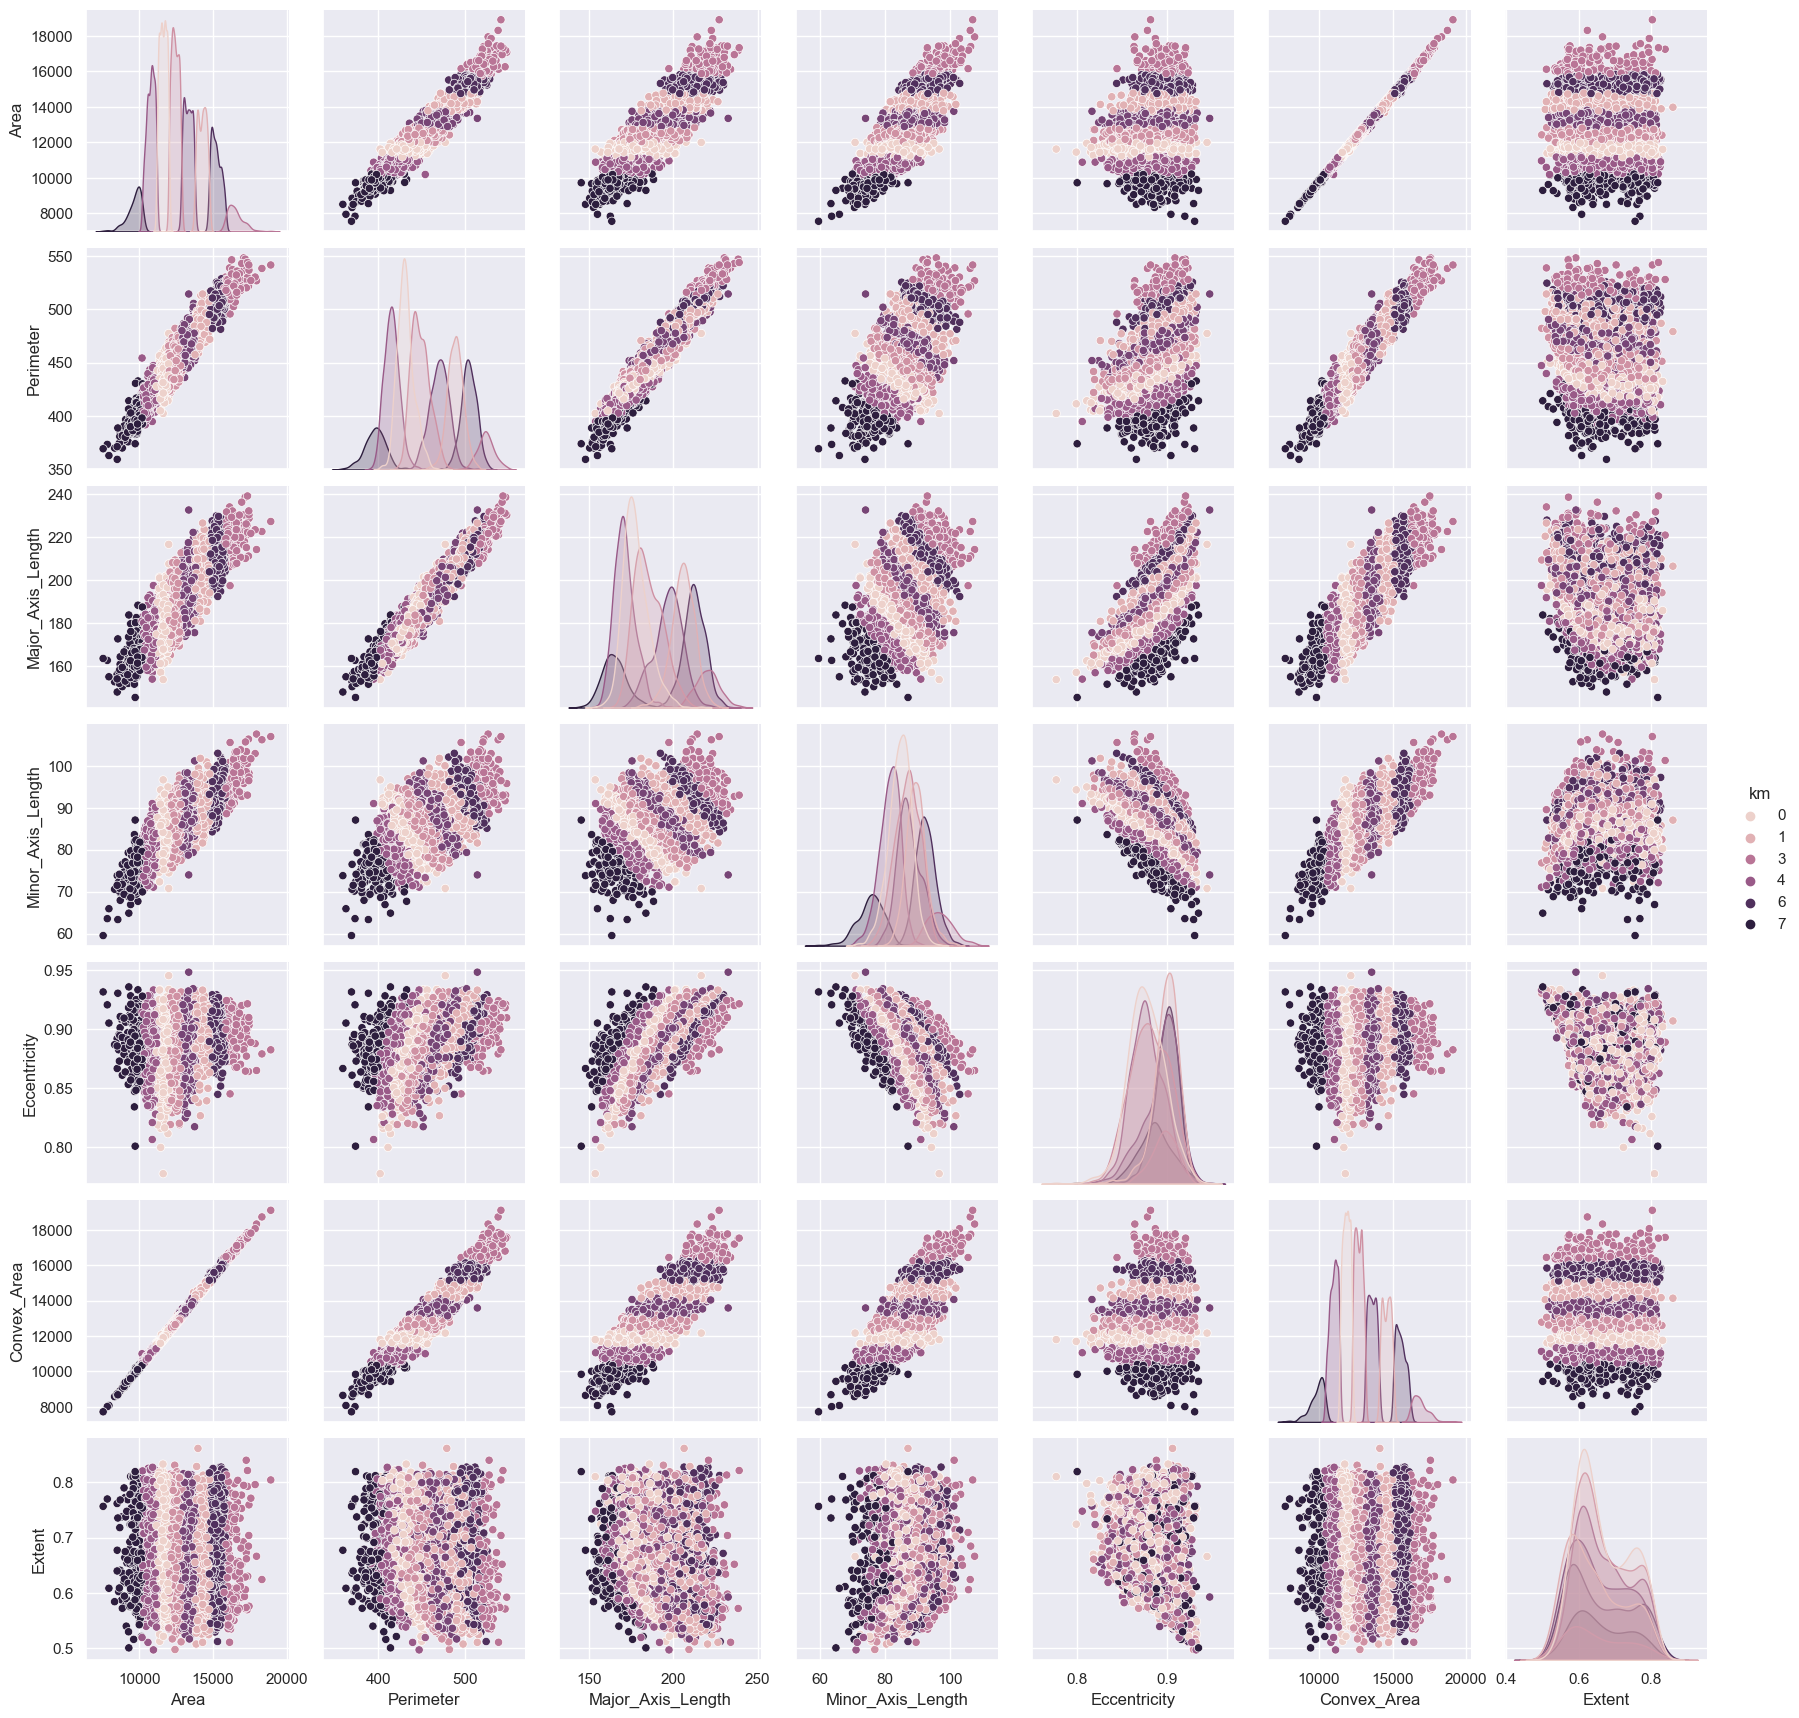

In [100]:
sns.pairplot(data=rice_df, hue='km')

Made a pairplot with the points colored by what the clustering learned.

In [101]:
metrics.silhouette_score(rice_X,rice_df['km'])

0.5159028354607172

This silhouette score suggests that there isn't the most clear separation between clustering.

We'll see if we can get better results by finding more optimal parameter values to use for KMeans.

In [107]:
n_cluster_vals = [2, 3, 4, 5, 6, 7, 8]
init_vals = [5, 10, 15]

In [108]:
max_score = 0
for n_cluster in n_cluster_vals:
    for init in init_vals:
        km = KMeans(n_clusters=n_cluster, n_init=init)
        predictions = km.fit_predict(rice_X)
        score = metrics.silhouette_score(rice_X, predictions)
        if (score > max_score):
            max_score = score
            n_cluster_opt = n_cluster
            init_opt = init

In [109]:
max_score

0.6066235887764735

In [110]:
n_cluster_opt

2

In [111]:
init_opt

5

In [115]:
print("The optimal number of clusters to use for KMeans is " + str(n_cluster_opt) + 
      "\nThe optimal init value is " + str(init_opt))

The optimal number of clusters to use for KMeans is 2
The optimal init value is 5


In [116]:
print("These optimal parameter values result in a silhouette score of " + str(max_score))

These optimal parameter values result in a silhouette score of 0.6066235887764735


We were able to find parameter values for the KMeans clustering algorithm that produced a better silhouette score, meaning there is more separation between groups and it is more effective at predicting what class each rice sample belongs to.

In [118]:
km_opt = KMeans(n_clusters=n_cluster_opt, n_init=init_opt)

In [119]:
rice_df['km_opt'] = km_opt.fit_predict(rice_X)

In [122]:
rice_df.sample()

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
1231  16865.0  517.747009         210.479446         103.804939      0.869925   

      Convex_Area    Extent   Class  km  km_opt  
1231      17234.0  0.650204  Cammeo   3       1

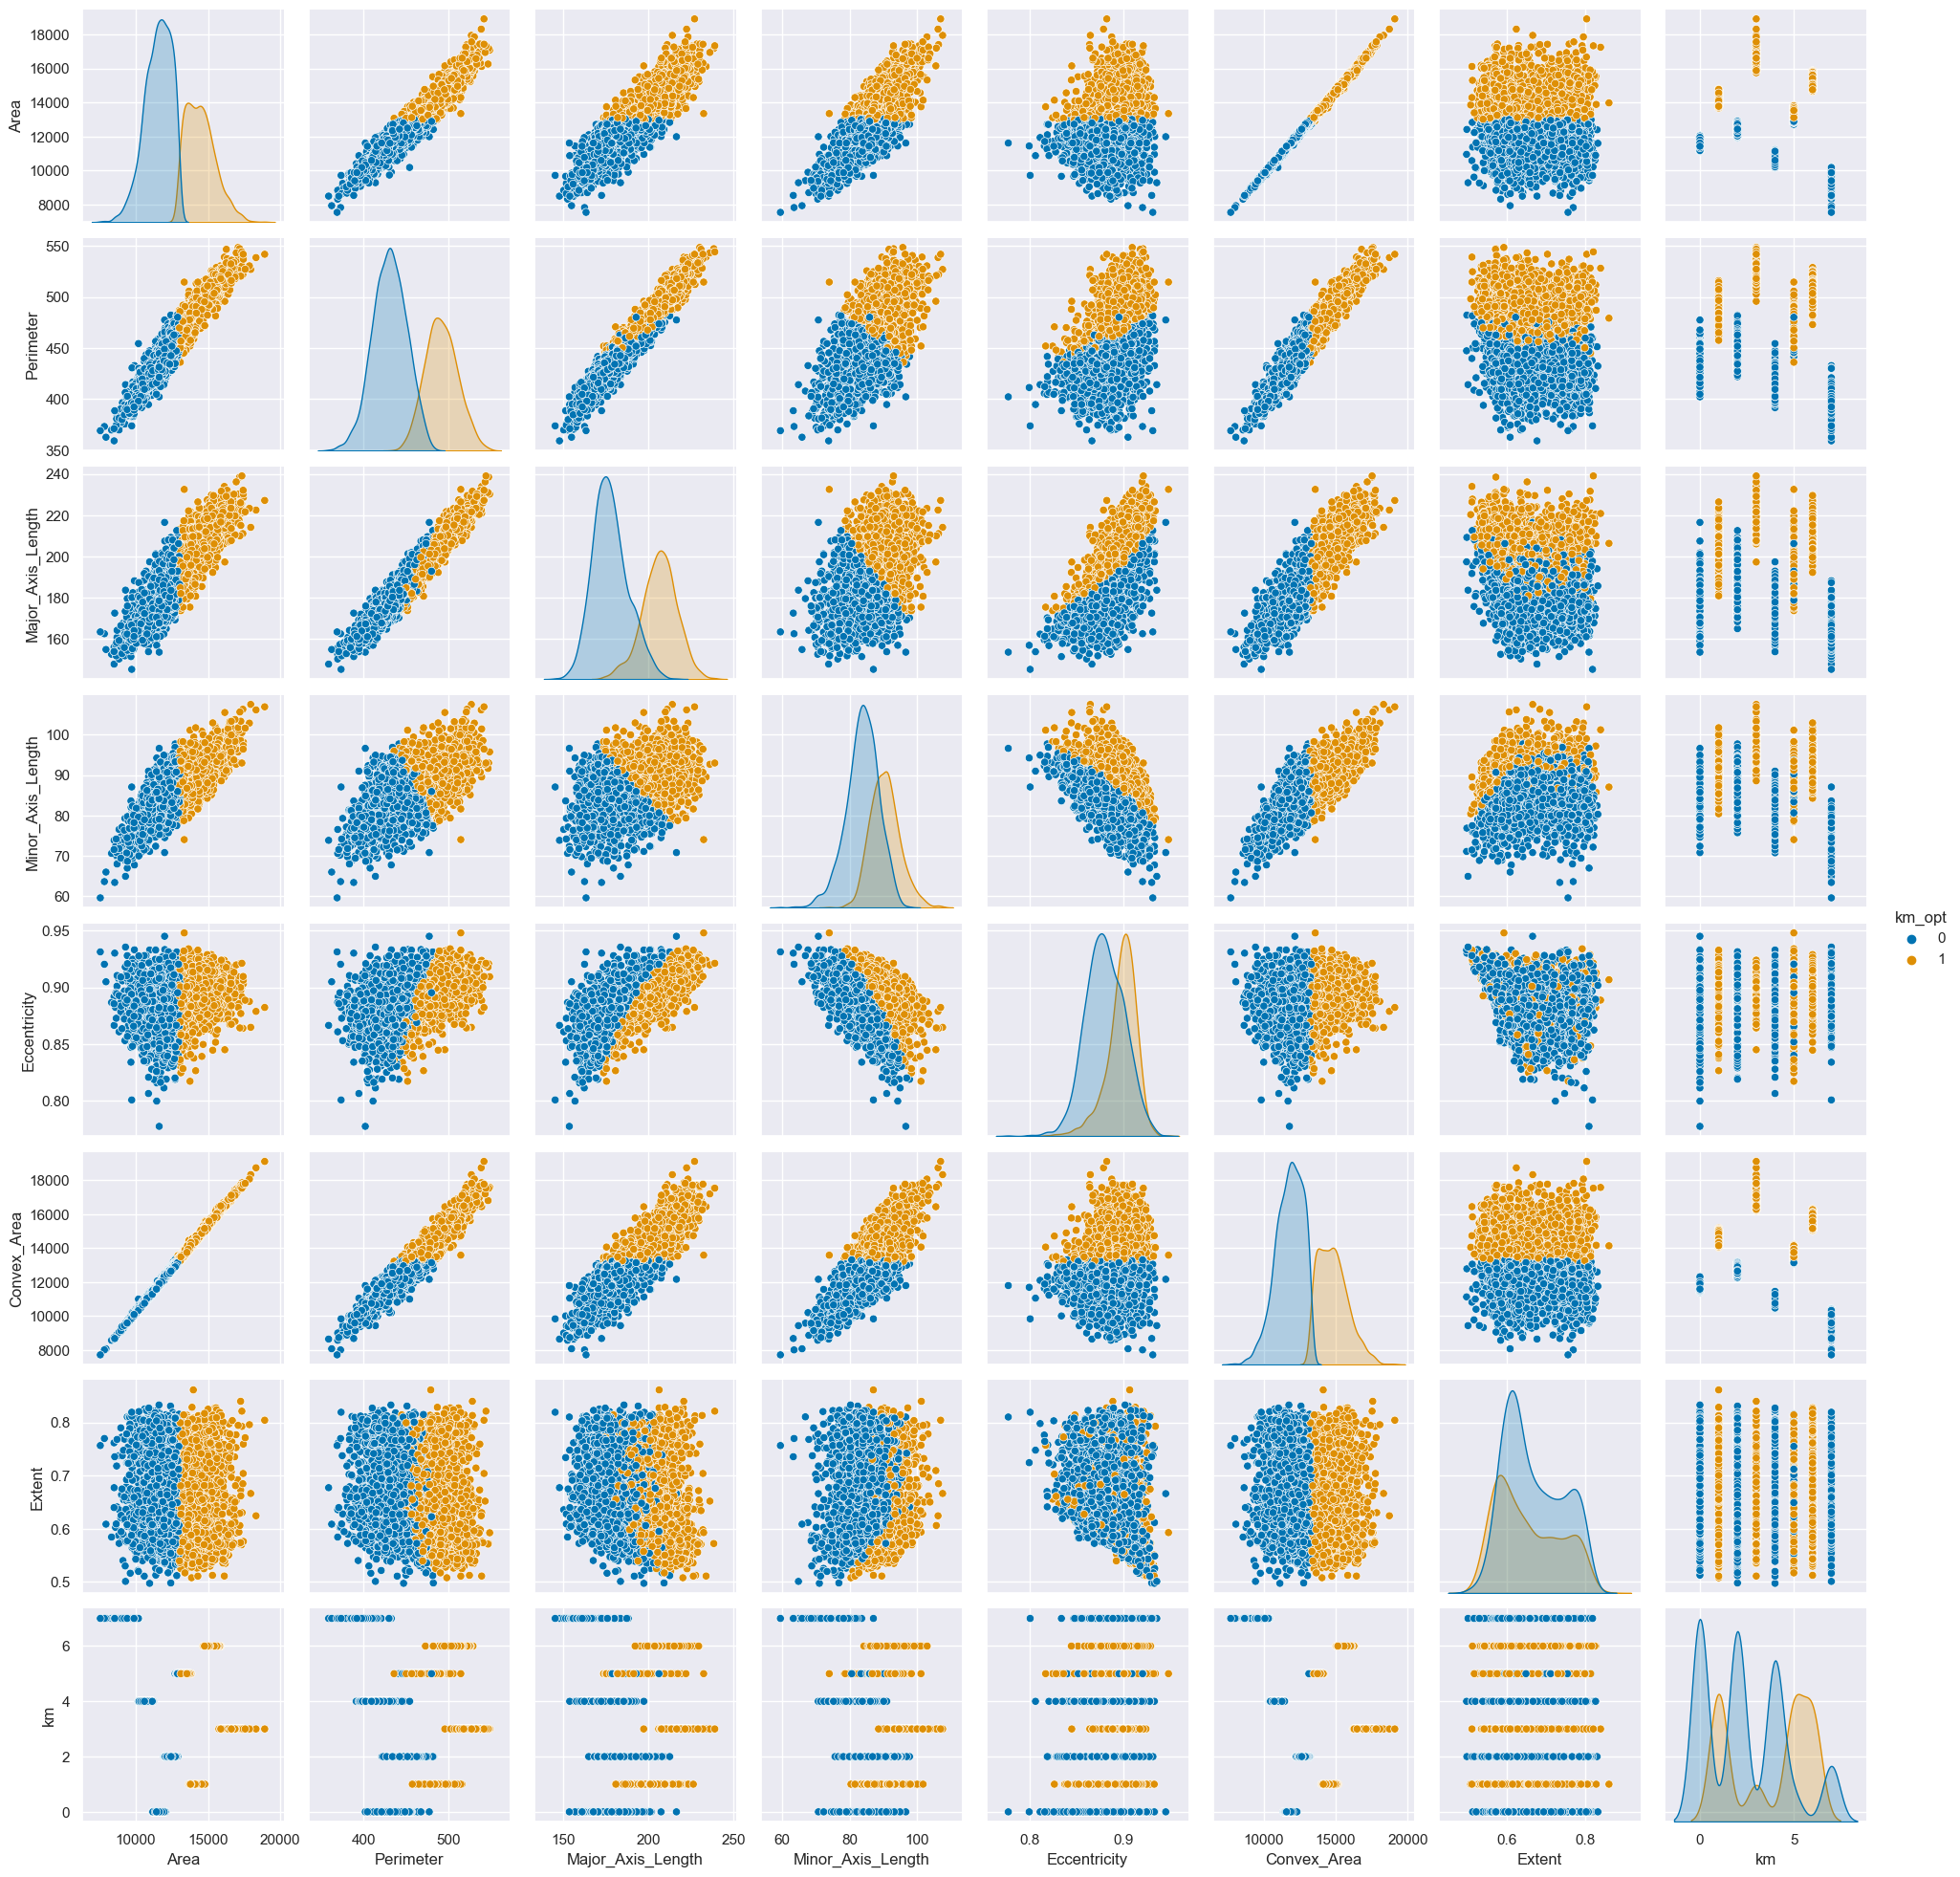

In [123]:
sns.pairplot(data=rice_df, hue='km_opt')

There is a much clearer separation between the two types of rice when better fit parameters are used.